# 2023 Arrest Data for neighborhoods in Pittsburgh

When looking to build a new park in a neighborhood in Pittsburgh, one important factor is the crime rate in each area. This dataset that has been selected shows a detailed amount of arrests in each neighborhood throughout the city. It includes a dataset of 65,0000 arrests dating from 2016 to 2023.

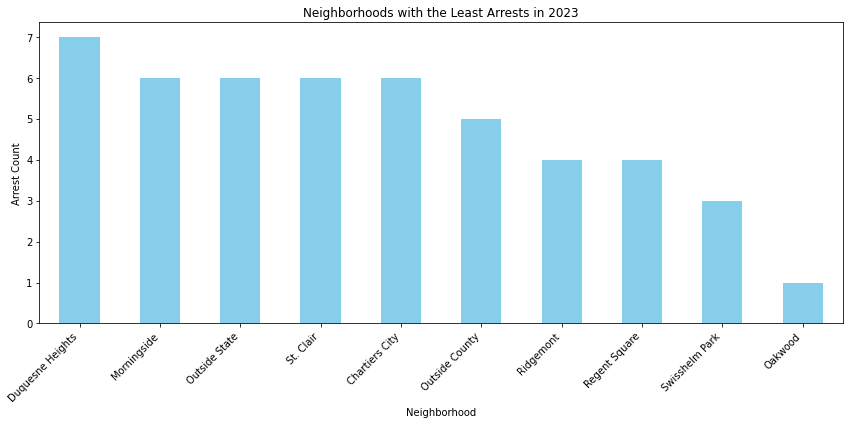

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("ArrestData.csv")
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])


filtered_df = df[df['ARRESTTIME'].dt.year == 2023]


neighborhood_counts = filtered_df['INCIDENTNEIGHBORHOOD'].value_counts()


bottom_10_neighborhoods = neighborhood_counts.tail(10)


plt.figure(figsize=(12, 6))
bottom_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Neighborhoods with the Least Arrests in 2023')
plt.xlabel('Neighborhood')
plt.ylabel('Arrest Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

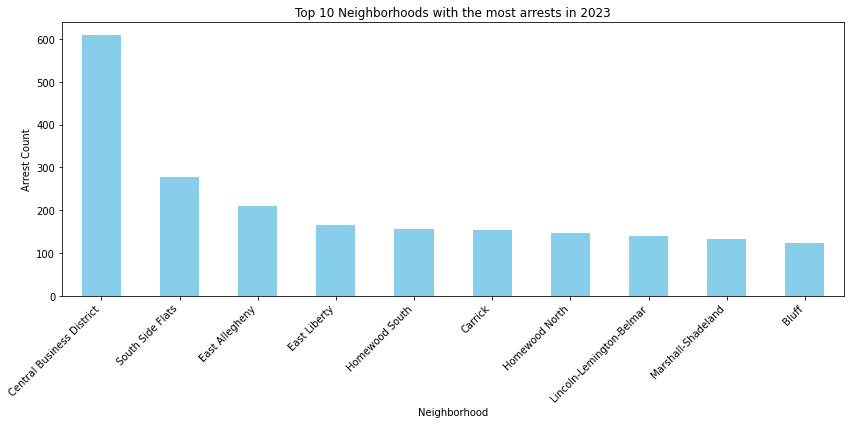

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("ArrestData.csv")
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])


filtered_df = df[df['ARRESTTIME'].dt.year == 2023]


neighborhood_counts = filtered_df['INCIDENTNEIGHBORHOOD'].value_counts()


top_10_neighborhoods = neighborhood_counts.head(10)


plt.figure(figsize=(12, 6))
top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the most arrests in 2023')
plt.xlabel('Neighborhood')
plt.ylabel('Arrest Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

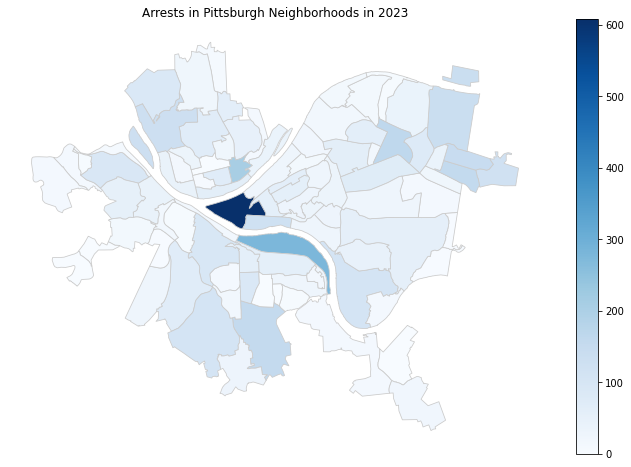

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


shapefile_path = 'City_of_Pittsburgh_Neighborhoods.shp'


neighborhoods_gdf = gpd.read_file(shapefile_path)



arrest_data = pd.read_csv("ArrestData.csv")
arrest_data['ARRESTTIME'] = pd.to_datetime(arrest_data['ARRESTTIME'])


arrests_2023 = arrest_data[arrest_data['ARRESTTIME'].dt.year == 2023]


neighborhood_counts = arrests_2023['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
neighborhood_counts.columns = ['INCIDENTNEIGHBORHOOD', 'Arrest Count']


neighborhoods_gdf = pd.merge(neighborhoods_gdf, neighborhood_counts, how='outer', left_on='HOOD', right_on='INCIDENTNEIGHBORHOOD')


neighborhoods_gdf['Arrest Count'] = neighborhoods_gdf['Arrest Count'].fillna(0)


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
neighborhoods_gdf.plot(column='Arrest Count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Arrests in Pittsburgh Neighborhoods in 2023')
ax.set_axis_off()

plt.show()

After taking a look at this data, we can see the top ten neighborhoods with the highest arrest rate in 2023, and the top ten neighborhoods with the lowest arrest rate in 2023, along with a map accompanying it. These arrests can range from possession of marijuana to terroristic threats, most are at the felony level. When looking to build a new park, the best neighborhood is not going to have a high volume of arrests. From the results pulled, the neighborhood with the least amount of arrests in 2023 is Oakwood. This neighborhood is located just a couple of neighborhoods West of Downtown, which has the highest arrest rate.